**Name   : Prathik B Shetty**

**Reg No : 211058019**

### **Feature 1 -> Energy** 

The **energy** of a signal corresponds to the total magntiude of the signal. For audio signals, that roughly corresponds to how loud the signal is. The energy in a signal is defined as

$\sum_{i=1}^{n} x_i^2$



### **Feature 2 -> Autocorrelation**

The autocorrelation is used to find repeated patterns within a signal. For musical signals, a repeated pattern can correspond to a pitch period. We can therefore use the autocorrelation function to estimate the pitch in a musical signal.




**References**
- https://musicinformationretrieval.com/energy.html
- https://www.rode.com/blog/all/what-is-signal-to-noise-ratio#:~:text=Signal%2Dto%2Dnoise%20ratio%20(,to%20unwanted%20sound%20(noise).
- https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8
- https://www.kaggle.com/ashkhagan/audio-signal-processing-librosa


### Import Libraries and Load Data

In [22]:
#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from scipy import stats

In [7]:
#File Path
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"

In [8]:
# load audio files with librosa
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file) #_ means same as above sr
duke, _ = librosa.load(duke_file)

### Basic Information of Audio Files

In [9]:
print("Debussy audio file shape : ",debussy.shape)
print("Redhot audio file shape : ",redhot.shape)
print("Duke audio file shape : ",duke.shape)


Debussy audio file shape :  (661500,)
Redhot audio file shape :  (661500,)
Duke audio file shape :  (661500,)


In [10]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print("Sample Duration : ", sample_duration)

Sample Duration :  4.5351473922902495e-05


In [12]:
# total number of samples in audio file
tot_samples = len(debussy)
print("Total Number of Samples :",tot_samples)

Total Number of Samples : 661500


In [13]:
# duration of  audios in seconds
duration = 1 / sr * tot_samples
print(f"The debussy audio lasts for {duration} seconds")
print(f"The redhot audio lasts for {duration} seconds")
print(f"The duke audio lasts for {duration} seconds")


The debussy audio lasts for 30.0 seconds
The redhot audio lasts for 30.0 seconds
The duke audio lasts for 30.0 seconds


### Visualising audio signal in the time domain

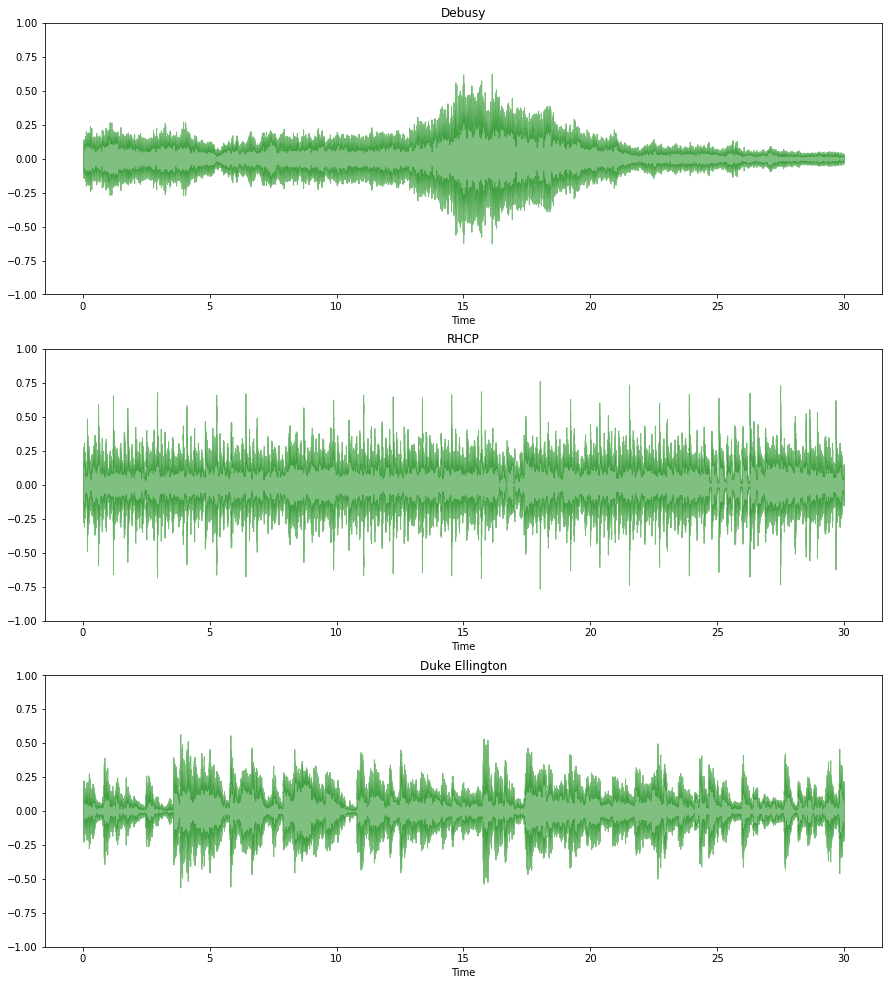

In [28]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5, color = 'green')
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5, color = 'green')
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5, color = 'green')
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

### **Feature 1 -> Energy**

In [29]:
hop_length = 512
frame_length = 1024

In [31]:
energy_debussy = np.array([
    sum(abs(debussy[i:i+frame_length]**2))
    for i in range(0, len(debussy), hop_length)
])

energy_duke = np.array([
    sum(abs(duke[i:i+frame_length]**2))
    for i in range(0, len(duke), hop_length)
])

energy_redhot = np.array([
    sum(abs(redhot[i:i+frame_length]**2))
    for i in range(0, len(redhot), hop_length)
])

### Visualizing Energy of audio signals

In [33]:
frames = range(len(energy_debussy))
t = librosa.frames_to_time(frames, hop_length=hop_length)

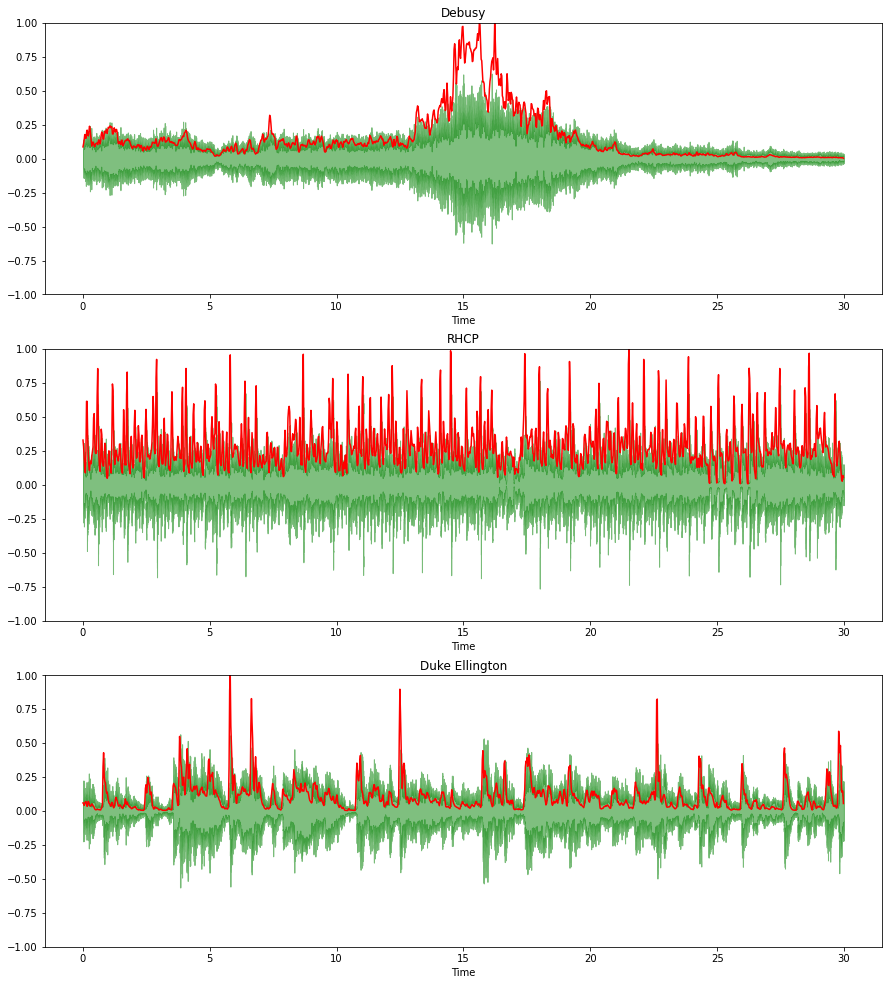

In [40]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5, color = 'g')
plt.plot(t, energy_debussy/energy_debussy.max(), color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5, color = 'g')
plt.plot(t, energy_redhot/energy_redhot.max(), color="r")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5, color = 'g')
plt.plot(t, energy_duke/energy_duke.max(), color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

### **Feature 2 -> Autocorrelation**

In [33]:
corr_debussy = librosa.autocorrelate(debussy)
corr_duke = librosa.autocorrelate(duke)
corr_redhot = librosa.autocorrelate(redhot)

### Visualizing Autocorrelation of audio signals

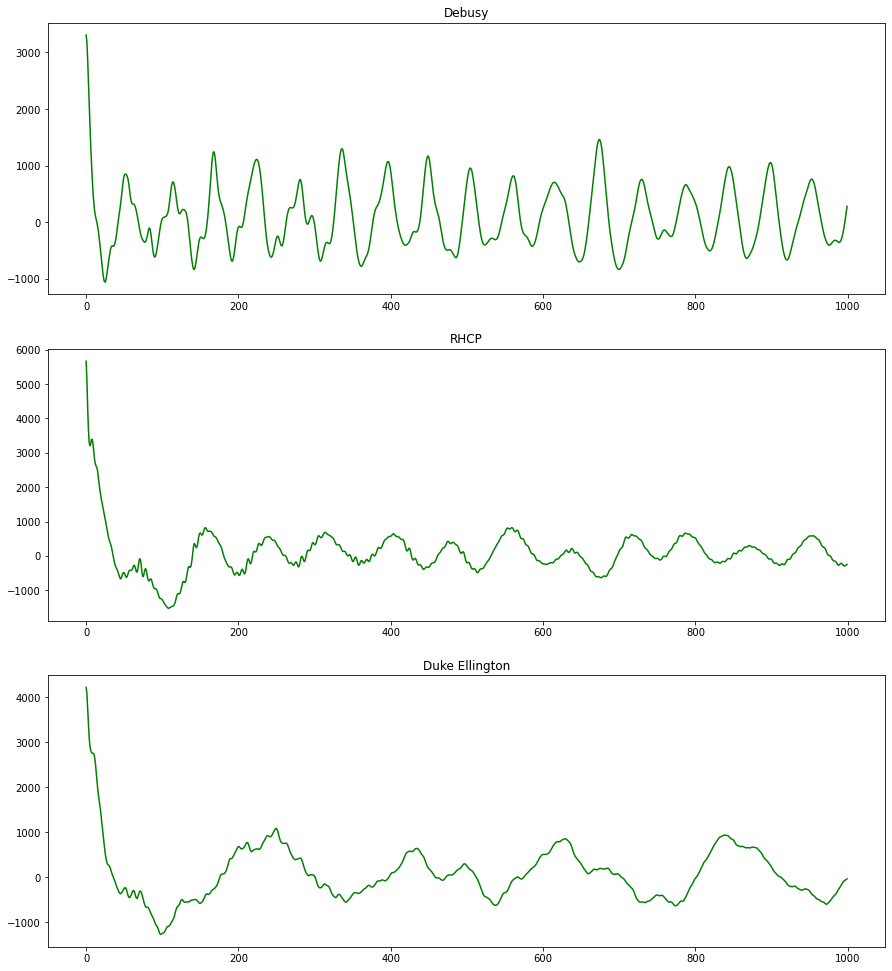

In [40]:
#Plot first 1000 Samples of the audio file
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
plt.plot(corr_debussy[:1000], color="g")
plt.title("Debusy")

plt.subplot(3, 1, 2)
plt.plot(corr_redhot[:1000], color="g")
plt.title("RHCP")

plt.subplot(3, 1, 3)
plt.plot(corr_duke[:1000], color="g")
plt.title("Duke Ellington")

plt.show()